Because our dataset is designed specifically for predicting pediatric pnemonia, all we do here is display the images to see if there is any manual way to distinguish between those with and without pneumonia. The EDA is done below: 

In [1]:
import tensorflow as tf
import numpy as np
import keras_tuner as kt
from matplotlib import pyplot as plt

C:\Users\Adin Sacho-Tanzer\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [7]:
#define paths used in this notebook
val_data_path = "../data/val"
figures_path = "../results/figures"

In [3]:
# rescale the images
img_size = 256
# 32 images per batch
batch_size = 32
# validation data privided pre-cleaned by the dataset
val_data = tf.keras.preprocessing.image_dataset_from_directory(
        val_data_path,
        image_size=(img_size, img_size),
        batch_size=batch_size,
        color_mode='grayscale',
        seed=123,
        labels="inferred")

Found 16 files belonging to 2 classes.


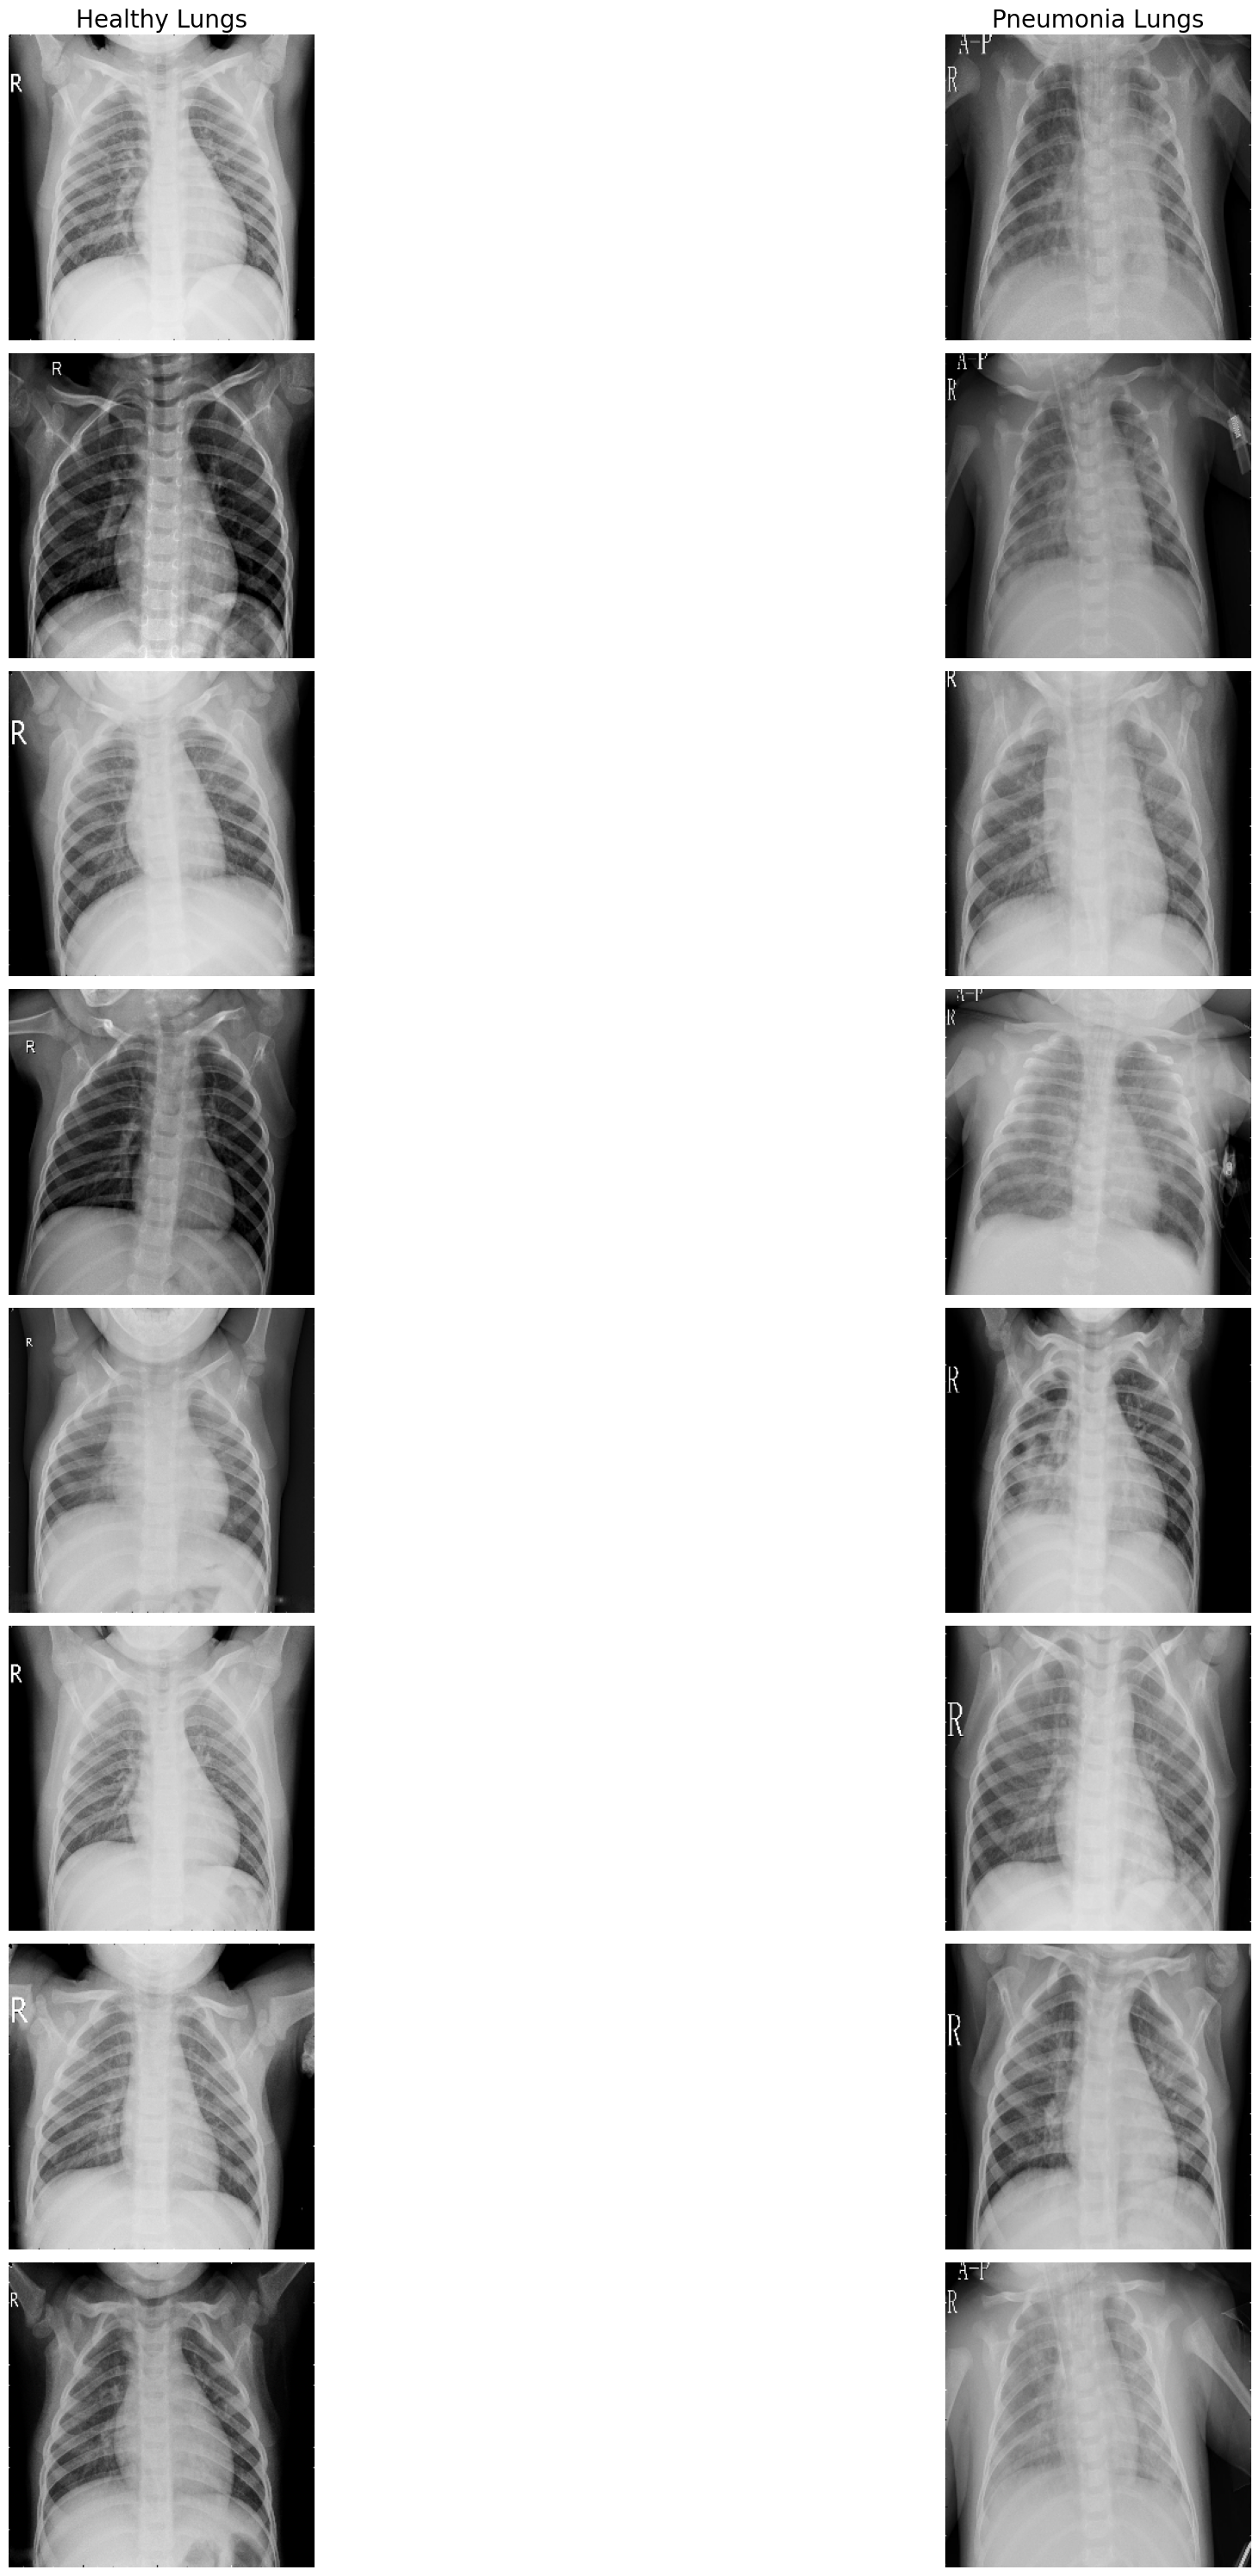

In [8]:
# load the model
for im, label in val_data.take(1).as_numpy_iterator():
    val_im = im
    val_label = label

# plot the 16 images (8 healthy and 8 pneumonia) from the validation dataset
fig, axs = plt.subplots(8, 2, figsize = (30, 30), dpi=100,  squeeze=True)
normal_plotted = 0
pneum_plotted = 0
for img_index in range(len(val_label)):
    if val_label[img_index] == 1:
        axs[pneum_plotted][1].imshow(val_im[img_index], aspect="equal", cmap = "gray")
        axs[pneum_plotted][1].axis("off")
        pneum_plotted += 1
    else:
        axs[normal_plotted][0].imshow(val_im[img_index], aspect="equal", cmap = "gray")
        axs[normal_plotted][0].axis("off")
        normal_plotted += 1
axs[0][0].set_title("Healthy Lungs", fontsize=20)
axs[0][1].set_title("Pneumonia Lungs", fontsize=20)

plt.tight_layout()
plt.savefig(figures_path+"/x-ray_comparison.png")
plt.show()

# the below images are the first 16 images in the validation dataset. The first 8 are healthy lungs and the second 8 are pneumonia lungs.
# The images are 256x256 pixels and in grayscale.
# The images are plotted in no specific order. 
# These images will be used to validate the model's performance on unseen data. We will train the model to 
# be able to distinguish between healthy and pneumonia lungs by looking at the images.
# We will also be able to see if there are any false positives or false negatives in the model's predictions.

It's hard to find any general trend which is visible to the naked eye to distinguish between these two. We are not doctors, nor are we radiologists. In general, the health lungs seem to be brighter, but there are bright pneumonia lungs and dull healthy lungs, so it's unclear if that is actually a meaningful distinction. Also, the pneumonia lungs seem to be cloudier than the health lungs, with less sharp edges. 